# Artificial Neural Networks - The Perceptron

At its simplest, the perceptron linearly combines inputs $x_1,\dots,x_n$ with weighting factors $w_1,\dots, w_n$ 

<img src="pix/simple-perceptron.pdf.png" width="300px">

$$y=w_0 + \sum_{k=0}^n w_i x_i = \bf{w}\cdot \bf{x}$$

Learning rule: $$w_i = w_i + \eta (y'-y)$$ where $\eta$ is a very small number, y is the predicted value for the given input vector $(x_1, \dots, x_n)$, and $y'$ is the target (training value).

## Example. Generate 10 data points randomly scattered about line $y=0.3x + 0.4$

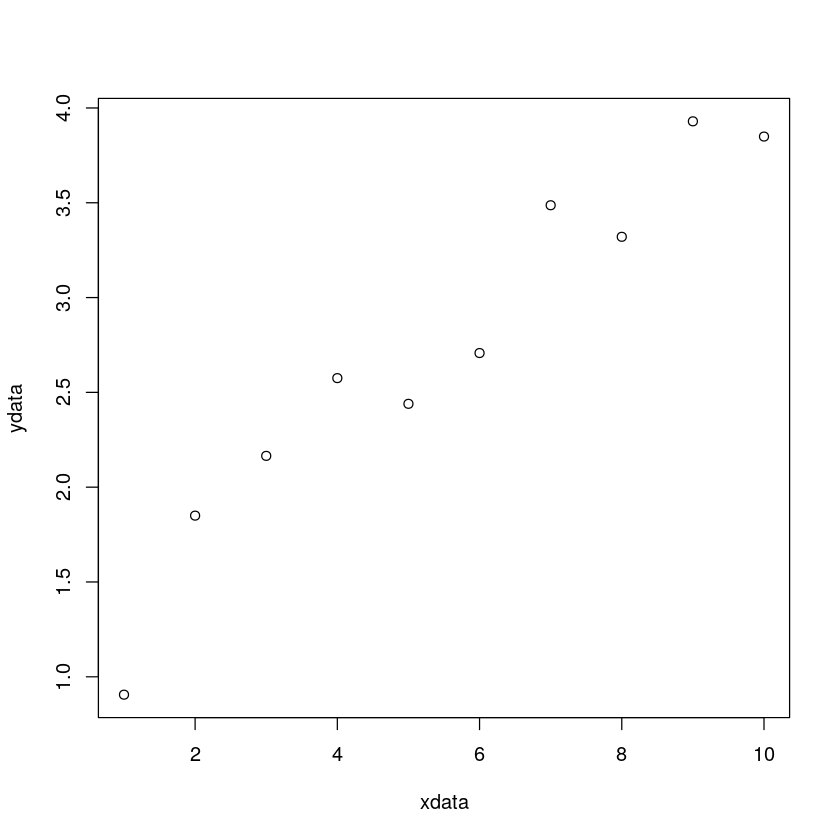

In [9]:
xdata = 1:10
ydata = .3*xdata+.4 + runif(10)
plot(xdata, ydata)

In [121]:
w = runif(2,max = 0.1)  # ranomize inital weights
eta = .001               # initialize rate of convergence
conv = .000001          # convergence criterion
#
# this will iterate for 1000 steps OR until conv is met
#
for (iteration in 1:100000){
    j=sample(1:10,1)    # pick a random integer 1 to 10
    x = xdata[j]        # pick a random data value (x,y')
    yprime = ydata[j]
    y = w[1] + w[2] * x     # calculate the nodes prediction
    dw = eta * (yprime - y)
    w = w + dw
    if (abs(dw) < conv){break}
    
}
print(paste("converged in ",iteration," iterations"))
print(paste("weights: ",w))

[1] "converged in  692  iterations"
[1] "weights:  0.33400087585119"  "weights:  0.421222871033526"


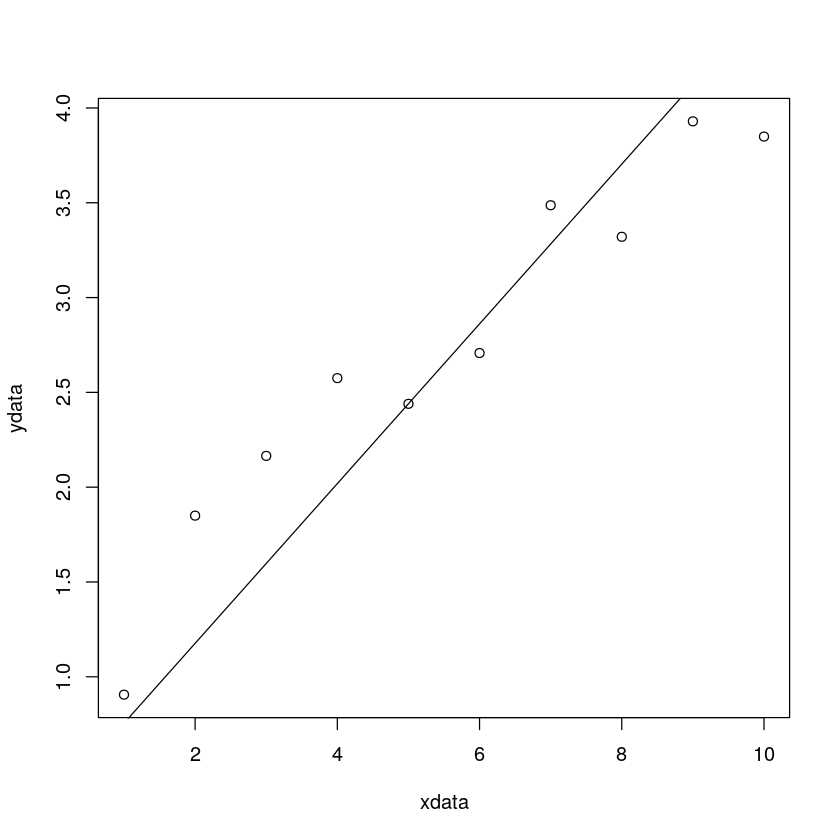

In [122]:
plot(xdata,ydata)
abline(w[1],w[2])

This isn't really any better than doing a linear regression. In fact, it can be shown that what we are doing in this process is minimizing the TSS error function

$$\mathcal{E} = \dfrac{1}{2}\sum_{k=1}^n(y'_i - y_i)^2$$

This is the same function that is minimized in least squares. 

The factor of 1/2 out front does not affect where the minimum occurs. It is included to cancel out the 2 that comes from differentiation. 

## The logistic sigmoid function simulates thresholding of outputs

$$ \sigma(x) = \dfrac{1}{1+e^{-x}}$$

In [56]:
sigma = function(x){1.0/(1+exp(-x))}

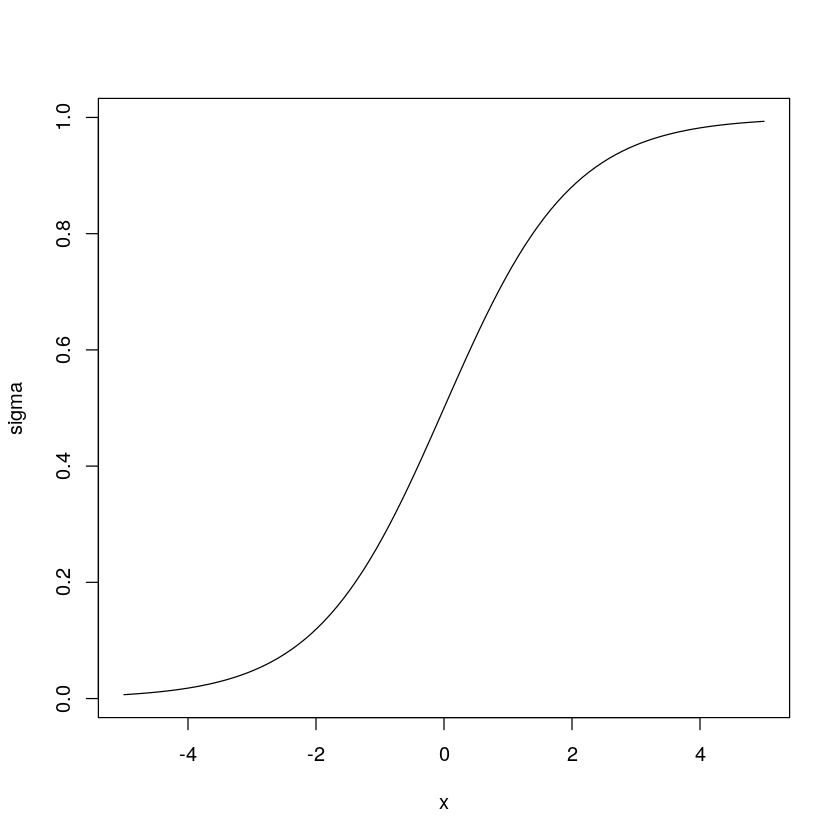

In [63]:
xgrid = seq(-5,5,length.out=100)
ygrid = sigma(xgrid)
plot(xgrid, ygrid,type="l",xlab="x",ylab="sigma")

Single neuron with thresholding is used to build multilayer nonlinear networks.

<img src="pix/mcculloch-pitts.svg" width="300 px">

If there are multiple y values, we can make a layer of nodes. 

<img src="pix/single-layer-perceptron.png" width="300px">

# Mutilayer Perceptron

<img src="pix/multilayer-perceptron.png">

## Worked example: First, do a linear fit 

read the data file and look at the first 10 rows. This data set is from the UCI ML repository

In [135]:
cars=read.table("./../datasets/cars.csv", TRUE, sep=",",na.strings="")
head(cars,10)

mpg,cyl,displ,hp,weight,accel,year,origin,model
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


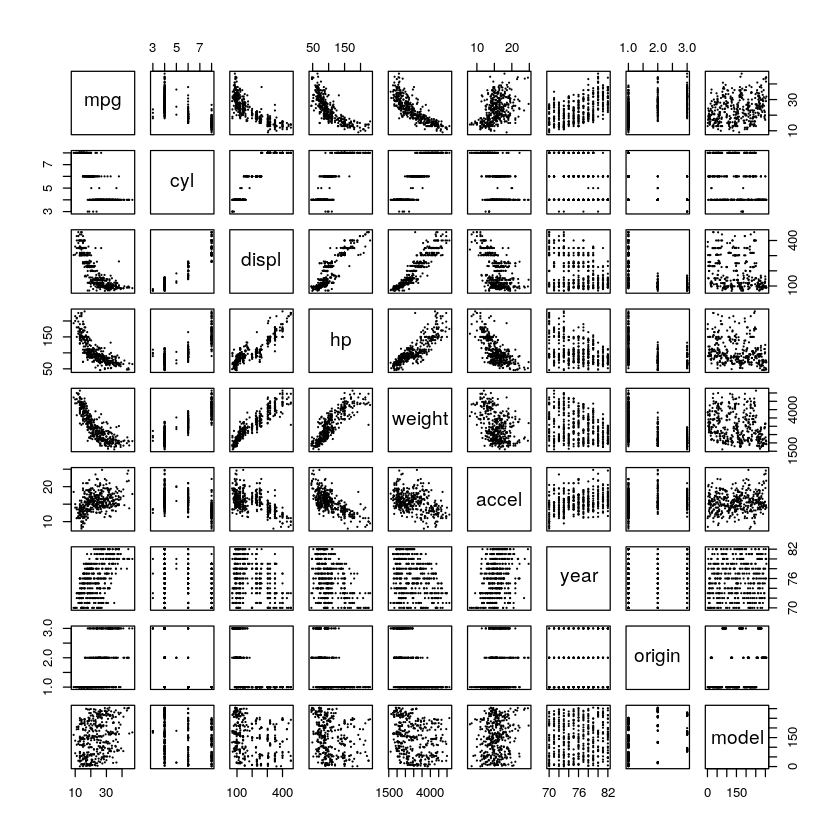

In [136]:
pairs(mpg~., data=cars, cex=.1)

Create a cleaned-up data set by removing records that have missing items

In [137]:
okcars=na.omit(cars)

Create test and training sets

In [138]:
n=nrow(okcars)
ind=sample(1:n,round(.75*n))
train=okcars[ind,]
test=okcars[-ind,]

Do a least squares fit for comparison

In [139]:
mpg.fit = glm(mpg~cyl+displ+hp+weight+accel, data=train)
mpg.prediction = predict(mpg.fit,newdata=test)

In [141]:
RSQUARED=function(obs,exp){
    n=length(exp)
    mu=mean(obs)
    tss=sum((obs-mu)^2)
    rss=sum((obs-exp)^2)
    1-rss/tss
}

In [147]:
RSQUARED(test$mpg,mpg.prediction)

[1] 0.6654744

## create scaled data for neural net

In [148]:
maximums  = apply(okcars[1:6], 2, max) # 2 means apply function over columns (1 is over rows)
minimums = apply(okcars[1:6], 2, min)
widths=maximums - minimums

scaled_cars = as.data.frame(scale(okcars[1:6], 
    center = minimums, scale = widths))

In [149]:
head(scaled_cars, 10)

mpg,cyl,displ,hp,weight,accel
0.2393617,1,0.6175711,0.4565217,0.5361497,0.23809524
0.1595745,1,0.7286822,0.6467391,0.5897363,0.20833333
0.2393617,1,0.6459948,0.5652174,0.5168699,0.17857143
0.1861702,1,0.6098191,0.5652174,0.5160193,0.23809524
0.2127660,1,0.6046512,0.5108696,0.5205557,0.14880952
0.1595745,1,0.9328165,0.8260870,0.7734619,0.11904762
0.1329787,1,0.9974160,0.9456522,0.7771477,0.05952381
0.1329787,1,0.9612403,0.9184783,0.7652396,0.02976190
0.1329787,1,1.0000000,0.9728261,0.7972781,0.11904762
0.1595745,1,0.8320413,0.7826087,0.6342501,0.02976190


Install the necessary library

In [150]:
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/home/mathman/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


we need to create a new test and training set because the data has been scaled.

In [152]:
train_neuralnet = scaled_cars[ind,]
test_neuralnet = scaled_cars[-ind,]
colnames(scaled_cars)

[1] "mpg"    "cyl"    "displ"  "hp"     "weight" "accel"

Train a neural net with one hidden layer with 3 neurons, using the scaled training data set.

NOTE: the format mpg ~ . DOES NOT WORK in neuralnet!!

In [153]:
nn.model = neuralnet(mpg ~ cyl+displ+hp+weight+accel, 
                     data=train_neuralnet,hidden=c(3),
                     linear.output=TRUE)

Generate some predictions from the scaled test data set. Note that column contains the y value so we only send columns 2 to 6 to the compute function, which must have the columns in the same order as the formula that was used in the first call to neuralnet

In [154]:
nn.predictions = compute(nn.model,test_neuralnet[2:6])

Unscale the data and compute R-sqsuared. 

When we did the scaling, the first index in the vectors was for mpg, which is the y value. 

In [155]:
obs=test_neuralnet[,1]*widths[1]+minimums[1]
pre=nn.predictions$net.result*widths[1]+minimums[1]
RSQUARED(obs,pre)

[1] 0.7217014342

In [156]:
1-sum((obs-pre)^2)/sum((obs-mean(obs))^2)

[1] 0.7217014342

## Plot the neural net

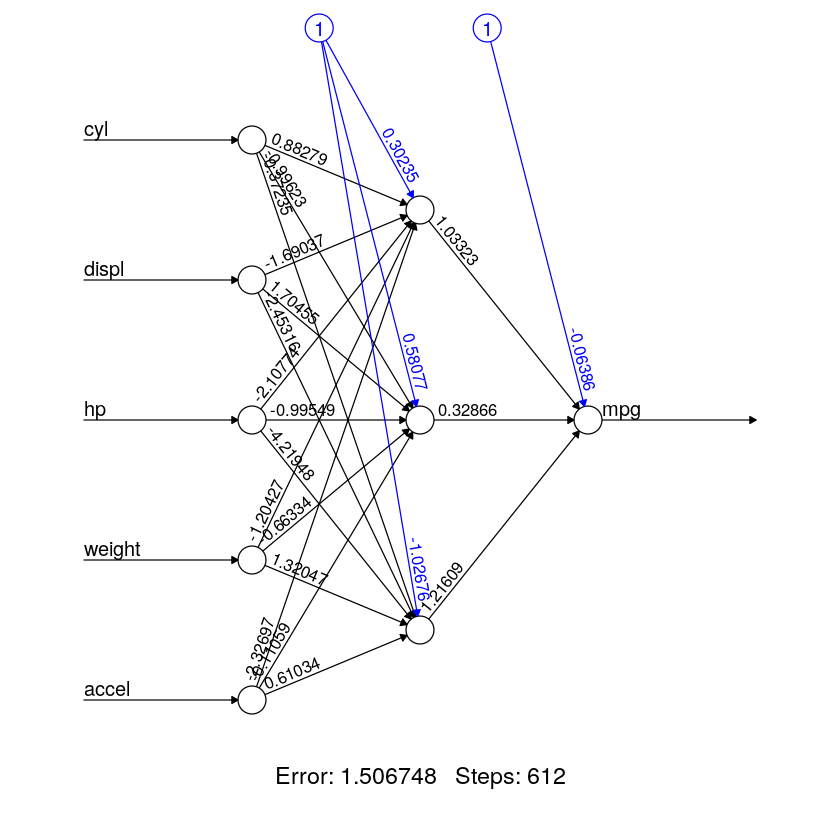

In [159]:
plot(nn.model, 
     show.weights=TRUE,                    
     rep="best", # if you don't include this it will try to
                 # plot every iteration and crash
     radius=.1,  # size of nodes
     arrow.length=.2)


## Plotting and saving to a file

In [161]:
pdf("my-neural-net.pdf",width=11,height=8)
plot(nn.model, 
     show.weights=TRUE,                    
     rep="best", # if you don't include this it will try to
                 # plot every iteration and crash
     radius=.1,  # size of nodes
     arrow.length=.2)
dev.off()

png 
  2

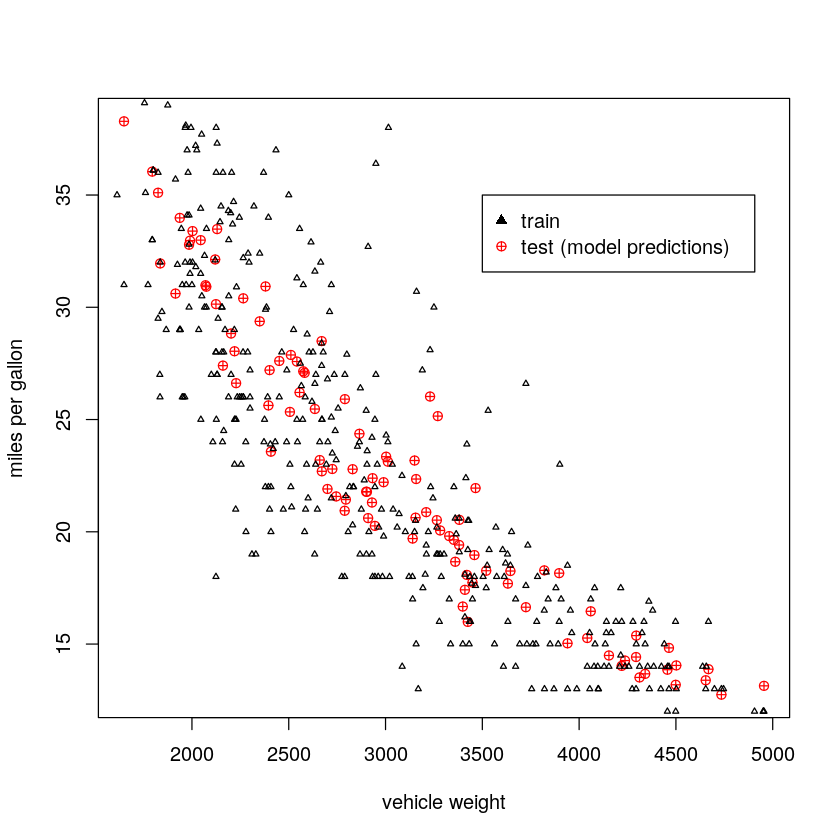

In [185]:
rescaled.test.vehicleweights=test_neuralnet$weight*widths[5]+minimums[5]

plot(rescaled.test.vehicleweights,pre,col="red", pch=10,
    ylab="miles per gallon",
    xlab="vehicle weight")
points(cars$weight,cars$mpg,pch=24, cex=0.5)

legend(3500,35, c("train","test (model predictions)"), col=c("black","red"), pch=c(17,10))


# Neural net with a non-linear model

In [194]:
solarflux=read.table("./../datasets/solar-flux.csv", TRUE, sep=",",na.strings="")
colnames(solarflux)

[1] "date" "flux"

In [195]:
head(solarflux,7)

date,flux
1947.125,202.75
1947.208,226.29
1947.292,264.15
1947.375,261.17
1947.458,217.54
1947.542,207.23
1947.625,231.21


In [198]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

named list()

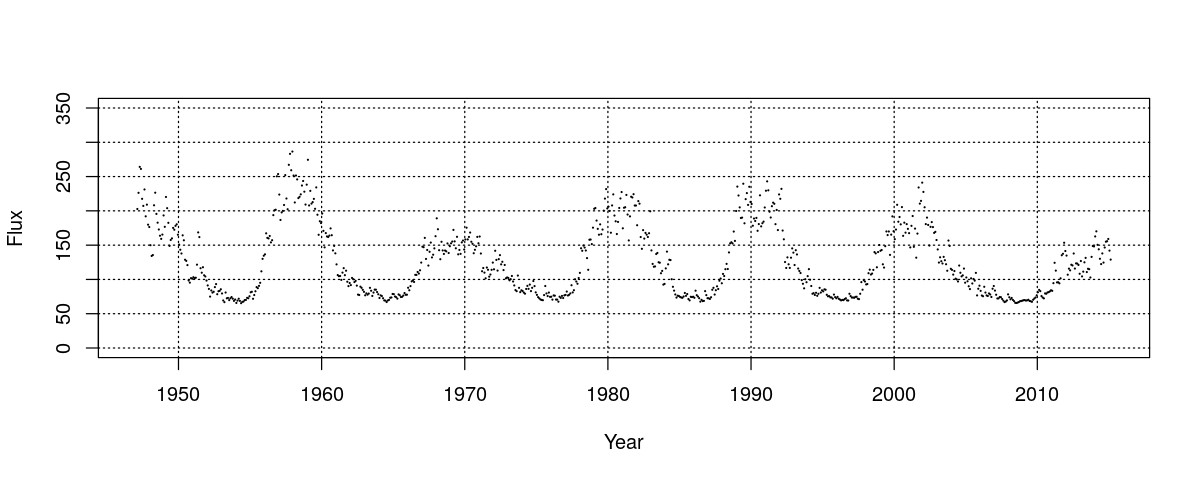

In [199]:
plot(solarflux$date,
     solarflux$flux,
     cex=0.1,# type="l",
     ylim=c(0,350),
    xlab="Year",ylab="Flux")
par(grid(lty="dotted",col="black"))

scale data and split into test and training sets

In [216]:
n=nrow(solarflux)
ind=sort(sample(1:n,round(.75*n)))

maximums  = apply(solarflux[1:2], 2, max) # 2 means apply function over columns (1 is over rows)
minimums = apply(solarflux[1:2], 2, min)
widths=maximums - minimums

scaled.flux = as.data.frame(scale(solarflux[1:2], center = minimums, scale = widths))

solar.scaled.train=scaled.flux[ind,]
solar.scaled.test=scaled.flux[-ind,]

Fit a neural network to the training data

In [217]:
model = neuralnet(flux~date, 
                  data=solar.scaled.train,
                  hidden=c(5,5,5,5),
                  linear.output=FALSE)
summary(model)

                    Length Class      Mode    
call                  5    -none-     call    
response            613    -none-     numeric 
covariate           613    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  2    data.frame list    
net.result            1    -none-     list    
weights               1    -none-     list    
startweights          1    -none-     list    
generalized.weights   1    -none-     list    
result.matrix       109    -none-     numeric 

In [218]:
scaled.flux.prediction = compute(model,solar.scaled.test[1])
predicted.flux = scaled.flux.prediction$net.result*widths[2]+minimums[2]

observed.flux=solar.scaled.test[,2]*widths[2]+minimums[2]
RSQUARED(observed.flux,predicted.flux)

[1] 0.9069239735

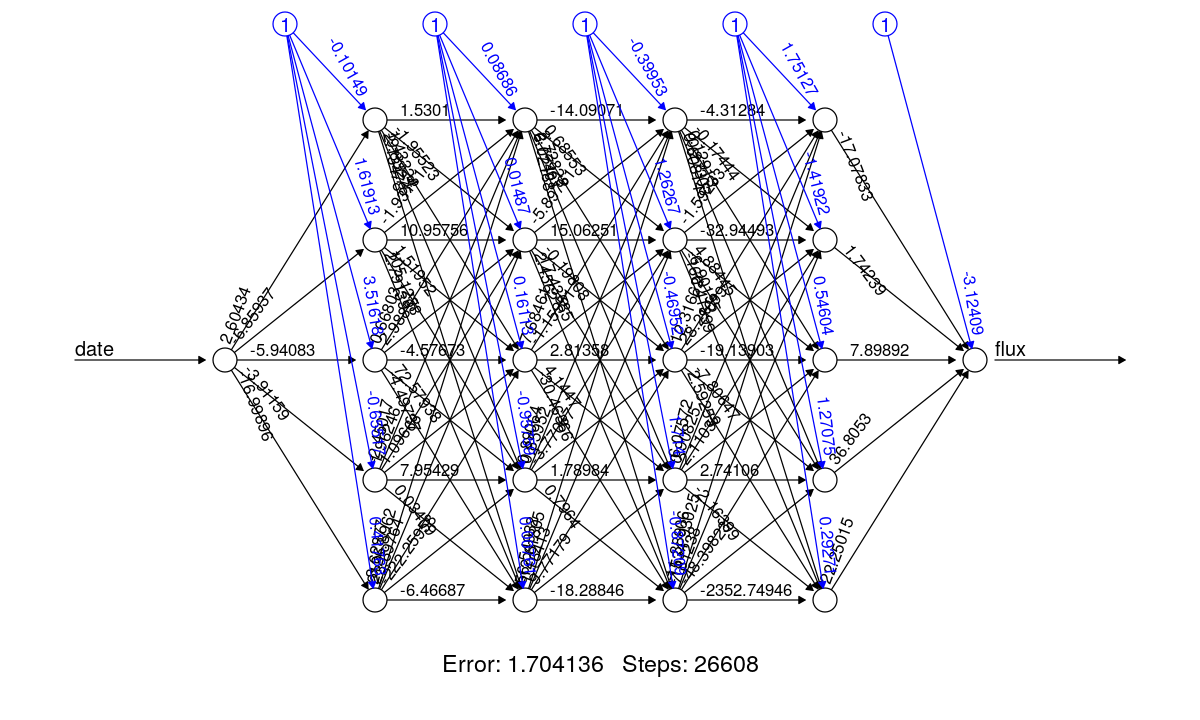

In [219]:
plot(model,rep="best",font=12,radius=0.1,arrow.length=.125)

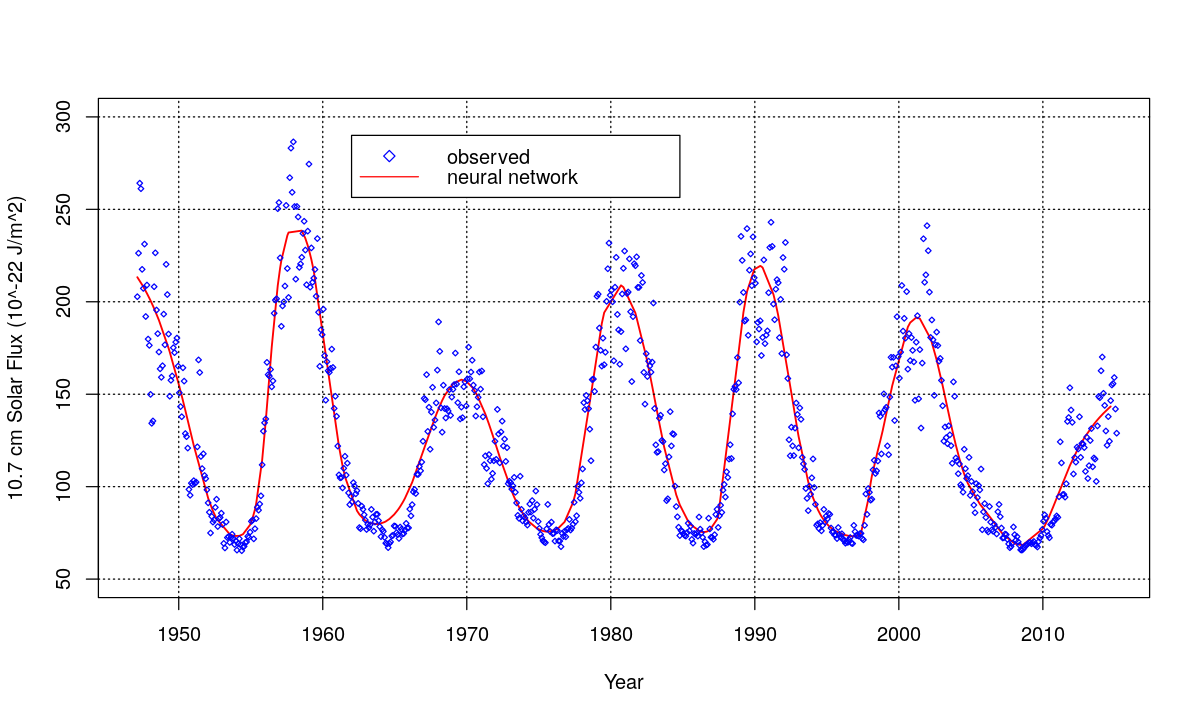

In [254]:
#pdf("solar-flux-by-neural-net-fit.pdf",width=10,height=6)
options(repr.plot.width=10, repr.plot.height=6)
year = solar.scaled.test$date*widths[1]+minimums[1]

plot(year, predicted.flux,
     type="l", lwd=1.5,
     xlab="Year",
     ylab="10.7 cm Solar Flux (10^-22 J/m^2)",
     col="red",
     ylim=c(50,300))

points(solarflux$date,solarflux$flux,cex=0.5,pch=23,col="blue",
       grid(lty="dotted",col="black"))

legend(1962,290,c("observed","neural network"),pch=c(23,NA),col=c("blue","red"),
    lty=c(0,1))
# lty = line type: 0 = no line, 1 = solid line
#dev.off()